# Data Cleaning: IRS

|Feature|Type|Description|
|---|---|---|
|zipcode|object|5-digit zip code for cities and towns in Connecticut|
|income_bucket|int|Size of adjusted gross income, binned into six categories*| 
|n_returns|int|Number of returns filed during the 12-month period of January 1, 2018 to December 31, 2018| 
|agi|int|Adjusted gross income| 
|total_income|int|Total income amount| 

Binned income categories  
1 = $1 under $25,000  
2 = $25,000 under $50,000  
3 = $50,000 under $75,000  
4 = $75,000 under $100,000  
5 = $100,000 under $200,000  
6 = $200,000 or more  

- Income and tax items with less than 20 returns within a ZIP code were excluded.
- ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999).


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import csv
irs = pd.read_csv("data_jessica/irs_ct17_FINAL.csv")
irs.head(20)

,ZIP\ncode [1],Size of adjusted gross income,Number of returns,Adjusted gross income (AGI) [5],Total income Amount
0,NaN,NaN,1,17,19
1,0.0,NaN,"1,745,670","175,806,955","178,646,447"
2,0.0,"$1 under $25,000",536950,6407627,6539884
3,0.0,"$25,000 under $50,000",370340,13538717,13757722
4,0.0,"$50,000 under $75,000",246070,15177475,15408274
5,0.0,"$75,000 under $100,000",167820,14550981,14752155
6,0.0,"$100,000 under $200,000",286890,39594151,40198835
7,0.0,"$200,000 or more",137600,86538004,87989577
8,NaN,NaN,NaN,NaN,NaN
9,6001.0,NaN,"9,260","1,693,439","1,731,672"


In [3]:
# Check shape
irs.shape

(2112, 5)

# Cleaning Steps
1. Update column names
2. Drop first row containing old headers
3. Drop empty (NaN) rows
4. Convert numerical columns from string to float datatype 
5. Convert zip codes to string and ensure all have 6 digits
6. Map numerical values to gross income bins
7. Drop rows for zip code totals 
8. Add a column that identifies county based on zipcode
9. Drop rows with zip code 00000 - outliers in dataset

## Rename Columns

In [4]:
irs.rename(columns={
    'ZIP\ncode [1]':'zipcode',
    'Size of adjusted gross income':'income_bucket',
    'Number of returns':'n_returns',
    'Adjusted gross income (AGI) [5]':'agi',
    'Total income Amount':'total_income'
}, inplace=True)

In [5]:
# drop first row
irs.drop(index=0, inplace=True)

In [6]:
irs.head()

,zipcode,income_bucket,n_returns,agi,total_income
1,0.0,NaN,"1,745,670","175,806,955","178,646,447"
2,0.0,"$1 under $25,000",536950,6407627,6539884
3,0.0,"$25,000 under $50,000",370340,13538717,13757722
4,0.0,"$50,000 under $75,000",246070,15177475,15408274
5,0.0,"$75,000 under $100,000",167820,14550981,14752155


## Remove Null Values

In [7]:
# Check for duplicates (NaN rows)
irs.duplicated().sum()

262

In [8]:
# Check for nulls - bucket column 2x amount of NaNs because of row totals
irs.isnull().sum()

zipcode          263
income_bucket    527
n_returns        263
agi              263
total_income     263
dtype: int64

In [9]:
# drop duplicates to remove NaN rows
irs.drop_duplicates(inplace=True)
irs.head(10)

,zipcode,income_bucket,n_returns,agi,total_income
1,0.0,NaN,"1,745,670","175,806,955","178,646,447"
2,0.0,"$1 under $25,000",536950,6407627,6539884
3,0.0,"$25,000 under $50,000",370340,13538717,13757722
4,0.0,"$50,000 under $75,000",246070,15177475,15408274
5,0.0,"$75,000 under $100,000",167820,14550981,14752155
6,0.0,"$100,000 under $200,000",286890,39594151,40198835
7,0.0,"$200,000 or more",137600,86538004,87989577
8,NaN,NaN,NaN,NaN,NaN
9,6001.0,NaN,"9,260","1,693,439","1,731,672"
10,6001.0,"$1 under $25,000",2100,19313,19920


In [10]:
# Drop remaining NaN row 
irs.drop(index=8, inplace=True)

In [11]:
irs.head(10)

,zipcode,income_bucket,n_returns,agi,total_income
1,0.0,NaN,"1,745,670","175,806,955","178,646,447"
2,0.0,"$1 under $25,000",536950,6407627,6539884
3,0.0,"$25,000 under $50,000",370340,13538717,13757722
4,0.0,"$50,000 under $75,000",246070,15177475,15408274
5,0.0,"$75,000 under $100,000",167820,14550981,14752155
6,0.0,"$100,000 under $200,000",286890,39594151,40198835
7,0.0,"$200,000 or more",137600,86538004,87989577
9,6001.0,NaN,"9,260","1,693,439","1,731,672"
10,6001.0,"$1 under $25,000",2100,19313,19920
11,6001.0,"$25,000 under $50,000",990,36486,37528


In [12]:
irs.isnull().sum()

zipcode            0
income_bucket    264
n_returns          0
agi                0
total_income       0
dtype: int64

## Clean Income Columns

In [13]:
# Check where asterisk is appearing
irs[(irs['n_returns']=="**")]

,zipcode,income_bucket,n_returns,agi,total_income
87,6024.0,"$200,000 or more",**,**,**
191,6051.0,"$200,000 or more",**,**,**
255,6065.0,"$200,000 or more",**,**,**
503,6112.0,"$200,000 or more",**,**,**
543,6120.0,"$200,000 or more",**,**,**
631,6243.0,"$200,000 or more",**,**,**
687,6256.0,"$200,000 or more",**,**,**
711,6262.0,"$200,000 or more",**,**,**
719,6264.0,"$200,000 or more",**,**,**
727,6266.0,"$200,000 or more",**,**,**


In [14]:
# Remove asterisk and commas in order to convert columns to integers
irs['agi'] = irs['agi'].replace('**', '0').str.replace(',', '').astype(int)
irs['n_returns'] = irs['n_returns'].replace('**', '0').str.replace(',', '').astype(int)
irs['total_income'] = irs['total_income'].replace('**', '0').str.replace(',', '').astype(int)

In [15]:
# Confirm datatypes
irs.dtypes

zipcode          float64
income_bucket     object
n_returns          int64
agi                int64
total_income       int64
dtype: object

## Clean Zipcode Column

In [16]:
#Convert zip codes to string, remove the '.0' and pad with a leading 0
irs['zipcode'] = irs['zipcode'].astype(str).str[:-2].str.pad(5, fillchar='0')

In [17]:
irs['zipcode'].value_counts()

06081    7
06024    7
06033    7
06785    7
06442    7
        ..
06260    7
06082    7
06750    7
06787    7
06107    7
Name: zipcode, Length: 264, dtype: int64

In [18]:
# Confirm equal number of income categories for each zip
irs['income_bucket'].value_counts()

$50,000 under $75,000      264
$75,000 under $100,000     264
$100,000 under $200,000    264
$25,000 under $50,000      264
$1 under $25,000           264
$200,000 or more           264
Name: income_bucket, dtype: int64

## Map income categories to numbers

In [19]:
# Replace gross income categories with numerical values
numerical_buckets = {np.nan : 0,
                     '$1 under $25,000': 1, 
                     '$25,000 under $50,000': 2,
                     '$50,000 under $75,000': 3,
                     '$75,000 under $100,000': 4,
                     '$100,000 under $200,000': 5,
                     '$200,000 or more': 6}

irs['income_bucket'] = irs['income_bucket'].map(numerical_buckets)
irs['income_bucket'].value_counts()

6    264
5    264
4    264
3    264
2    264
1    264
0    264
Name: income_bucket, dtype: int64

In [20]:
irs.head(20)

,zipcode,income_bucket,n_returns,agi,total_income
1,00000,0,1745670,175806955,178646447
2,00000,1,536950,6407627,6539884
3,00000,2,370340,13538717,13757722
4,00000,3,246070,15177475,15408274
5,00000,4,167820,14550981,14752155
6,00000,5,286890,39594151,40198835
7,00000,6,137600,86538004,87989577
9,06001,0,9260,1693439,1731672
10,06001,1,2100,19313,19920
11,06001,2,990,36486,37528


## Remove Zipcode Totals and Irrelevant Zipcodes

In [21]:
# Create separate dataframe to house the totals for each zipcode
totals = irs[irs['income_bucket'] == 0]
totals.head()

,zipcode,income_bucket,n_returns,agi,total_income
1,00000,0,1745670,175806955,178646447
9,06001,0,9260,1693439,1731672
17,06002,0,11910,972517,985082
25,06010,0,30300,1774165,1796232
33,06013,0,4700,528560,538156


In [34]:
# Drop zipcode totals from irs dataframe
irs.drop(irs[irs['income_bucket'] == 0].index, inplace=True)

In [43]:
# Drop zip code 00000 and 99999 from dataframe - creating outliers
irs.drop(irs[(irs['zipcode'] == '00000')].index | irs[(irs['zipcode'] == '99999')].index, inplace=True)

In [44]:
irs.describe()

,income_bucket,n_returns,agi,total_income
count,1572.000000,1572.000000,1.572000e+03,1.572000e+03
mean,3.500000,1103.899491,1.112538e+05,1.130549e+05
std,1.708369,1364.348693,3.808226e+05,3.855261e+05
min,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.000000,240.000000,1.511225e+04,1.532300e+04
50%,3.500000,620.000000,4.097550e+04,4.193250e+04
75%,5.000000,1432.500000,1.020255e+05,1.034412e+05
max,6.000000,11800.000000,9.112097e+06,9.187790e+06


## Add City Column

In [60]:
# Create dictionary that maps zipcodes to cities
city_dictionary = {"06801":"Bethel",
"06604":"Bridgeport",
"06605":"Bridgeport",
"06606":"Bridgeport",
"06607":"Bridgeport",
"06608":"Bridgeport",
"06610":"Bridgeport",
"06804":"Brookfield",
"06807":"Cos Cob",
"06810":"Danbury",
"06811":"Danbury",
"06820":"Darien",
"06612":"Easton",
"06824":"Fairfield",
"06825":"Fairfield",
"06830":"Greenwich",
"06831":"Greenwich",
"06468":"Monroe",
"06840":"New Canaan",
"06812":"New Fairfield",
"06470":"Newtown",
"06850":"Norwalk",
"06851":"Norwalk",
"06853":"Norwalk",
"06854":"Norwalk",
"06855":"Norwalk",
"06856":"Norwalk",
"06870":"Old Greenwich",
"06896":"Redding",
"06877":"Ridgefield",
"06878":"Riverside",
"06482":"Sandy Hook",
"06484":"Shelton",
"06784":"Sherman",
"06890":"Southport",
"06901":"Stamford",
"06902":"Stamford",
"06903":"Stamford",
"06905":"Stamford",
"06906":"Stamford",
"06907":"Stamford",
"06614":"Stratford",
"06615":"Stratford",
"06611":"Trumbull",
"06883":"Weston",
"06880":"Westport",
"06897":"Wilton",
"06750":"Bantam",
"06063":"Barkhamsted",
"06751":"Bethlehem Village",
"06752":"Bridgewater",
"06018":"Canaan",
"06021":"Colebrook",
"06754":"Cornwall Bridge",
"06024":"East Canaan",
"06031":"Falls Village",
"06755":"Gaylordsville",
"06756":"Goshen",
"06757":"Kent",
"06758":"Lakeside",
"06039":"Lakeville",
"06759":"Litchfield",
"06763":"Morris",
"06057":"New Hartford",
"06061":"New Hartford Center",
"06776":"New Milford",
"06777":"New Preston",
"06058":"Norfolk",
"06778":"Northfield",
"06791":"Northwest Harwinton",
"06779":"Oakville",
"06782":"Plymouth",
"06065":"Riverton",
"06783":"Roxbury",
"06068":"Salisbury",
"06069":"Sharon",
"06785":"South Kent",
"06786":"Terryville",
"06787":"Thomaston",
"06790":"Torrington",
"06793":"Washington",
"06794":"Washington Depot",
"06795":"Watertown",
"06796":"West Cornwall",
"06098":"Winsted",
"06798":"Woodbury",
"06401":"Ansonia",
"06403":"Beacon Falls",
"06524":"Bethany",
"06405":"Branford",
"06410":"Cheshire",
"06418":"Derby",
"06512":"East Haven",
"06437":"Guilford",
"06514":"Hamden",
"06517":"Hamden",
"06518":"Hamden",
"06443":"Madison",
"06450":"Meriden",
"06451":"Meriden",
"06762":"Middlebury",
"06460":"Milford",
"06461":"Milford",
"06770":"Naugatuck",
"06519":"New Haven",
"06515":"New Haven",
"06513":"New Haven",
"06510":"New Haven",
"06511":"New Haven",
"06471":"North Branford",
"06473":"North Haven",
"06472":"Northford",
"06477":"Orange",
"06478":"Oxford",
"06712":"Prospect",
"06483":"Seymour",
"06488":"Southbury",
"06492":"Wallingford",
"06702":"Waterbury",
"06704":"Waterbury",
"06705":"Waterbury",
"06706":"Waterbury",
"06708":"Waterbury",
"06710":"Waterbury",
"06516":"West Haven",
"06716":"Wolcott",
"06525":"Woodbridge",
"06160":"Aetna Insurance",
"06001":"Avon",
"06037":"Berlin",
"06002":"Bloomfield",
"06010":"Bristol",
"06016":"Broad Brook",
"06013":"Burlington",
"06019":"Canton",
"06020":"Canton Center",
"06022":"Collinsville",
"06023":"East Berlin",
"06026":"East Granby",
"06118":"East Hartford",
"06108":"East Hartford",
"06027":"East Hartland",
"06088":"East Windsor",
"06082":"Enfield",
"06032":"Farmington",
"06033":"Glastonbury",
"06035":"Granby",
"06103":"Hartford",
"06105":"Hartford",
"06106":"Hartford",
"06112":"Hartford",
"06114":"Hartford",
"06120":"Hartford",
"06040":"Manchester",
"06042":"Manchester",
"06444":"Marion",
"06447":"Marlborough",
"06467":"Milldale",
"06051":"New Britain",
"06052":"New Britain",
"06053":"New Britain",
"06111":"Newington",
"06059":"North Canton",
"06060":"North Granby",
"06062":"Plainville",
"06479":"Plantsville",
"06067":"Rocky Hill",
"06070":"Simsbury",
"06073":"South Glastonbury",
"06074":"South Windsor",
"06489":"Southington",
"06078":"Suffield",
"06081":"Tariffville",
"06085":"Unionville",
"06089":"Weatogue",
"06090":"West Granby",
"06107":"West Hartford",
"06110":"West Hartford",
"06117":"West Hartford",
"06119":"West Hartford",
"06091":"West Hartland",
"06092":"West Simsbury",
"06093":"West Suffield",
"06109":"Wethersfield",
"06095":"Windsor",
"06096":"Windsor Locks",
"07001":"Avenel",
"07008":"Carteret",
"07067":"Colonia",
"08512":"Cranbury",
"08810":"Dayton",
"08812":"Dunellen",
"08816":"East Brunswick",
"08817":"Edison",
"08820":"Edison",
"08837":"Edison",
"08863":"Fords",
"08828":"Helmetta",
"08904":"Highland Park",
"08830":"Iselin",
"08832":"Keasbey",
"08824":"Kendall Park",
"08840":"Metuchen",
"08846":"Middlesex",
"08850":"Milltown",
"08852":"Monmouth Junction",
"08831":"Monroe Township",
"08901":"New Brunswick",
"08902":"North Brunswick",
"08857":"Old Bridge",
"08861":"Perth Amboy",
"08854":"Piscataway",
"07064":"Port Reading",
"08536":"Princeton Meadows",
"08859":"Sayreville",
"08872":"Sayreville",
"07077":"Sewaren",
"08879":"South Amboy",
"07080":"South Plainfield",
"08882":"South River",
"08884":"Spotswood",
"07095":"Woodbridge",
"06231":"Amston",
"06232":"Andover",
"06043":"Bolton",
"06237":"Columbia",
"06238":"Coventry",
"06029":"Ellington",
"06248":"Hebron",
"06250":"Mansfield Center",
"06071":"Somers",
"06076":"Stafford Springs",
"06269":"Storrs",
"06268":"Storrs Mansfield",
"06084":"Tolland",
"06066":"Vernon Rockville",
"06279":"Willington",
"06330":"Baltic",
"06334":"Bozrah",
"06415":"Colchester",
"06333":"East Lyme",
"06335":"Gales Ferry",
"06336":"Gilman",
"06340":"Groton",
"06350":"Hanover",
"06351":"Jewett City",
"06249":"Lebanon",
"06339":"Ledyard",
"06355":"Mystic",
"06320":"New London",
"06357":"Niantic",
"06254":"North Franklin",
"06359":"North Stonington",
"06360":"Norwich",
"06389":"Norwich",
"06380":"Norwich",
"06370":"Oakdale",
"06371":"Old Lyme",
"06353":"Oxoboxo River",
"06379":"Pawcatuck",
"06365":"Preston",
"06375":"Quaker Hill",
"06420":"Salem",
"06376":"South Lyme",
"06378":"Stonington",
"06382":"Uncasville",
"06384":"Voluntown",
"06385":"Waterford",
"06278":"Ashford",
"06234":"Brooklyn",
"06331":"Canterbury",
"06332":"Central Village",
"06235":"Chaplin",
"06239":"Danielson",
"06241":"Dayville",
"06243":"East Killingly",
"06242":"Eastford",
"06247":"Hampton",
"06354":"Moosup",
"06255":"North Grosvenordale",
"06256":"North Windham",
"06373":"Oneco",
"06374":"Plainfield",
"06259":"Pomfret Center",
"06260":"Putnam",
"06262":"Quinebaug",
"06263":"Rogers",
"06264":"Scotland",
"06266":"South Windham",
"06377":"Sterling",
"06277":"Thompson",
"06387":"Wauregan",
"06226":"Willimantic",
"06280":"Windham",
"06281":"Woodstock",
"06282":"Woodstock Valley"}

In [61]:
irs['city'] = irs['zipcode'].map(city_dictionary)

In [69]:
irs[(irs['city'] == 'New Haven')].count()

zipcode          30
income_bucket    30
n_returns        30
agi              30
total_income     30
city             30
dtype: int64

# Visualizations

In [25]:
# Plot boxplots to view population distribution per income bucket

def income_hist(num):
    df = irs[irs['income_bucket'] == num]
    fig, ax = plt.subplots(figsize=(13,2))
    sns.boxplot(x=df['total_income'], ax=ax)
    ax.set_title(f"Population Distribution in Bucket {num}")
    ax.set_xlabel('Population Count')
    ax.tick_params(labelsize=10);
    

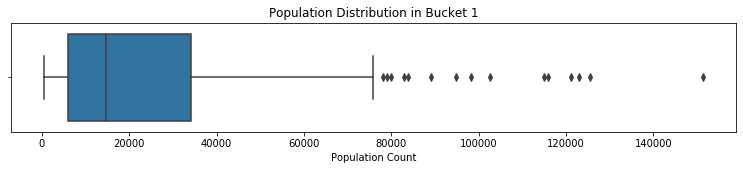

In [26]:
income_hist(1)

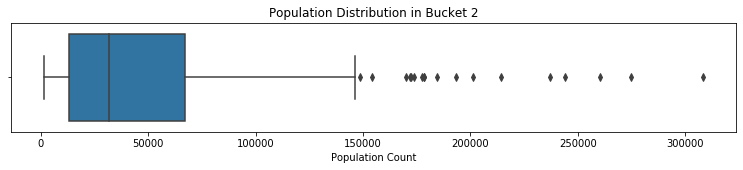

In [27]:
income_hist(2)

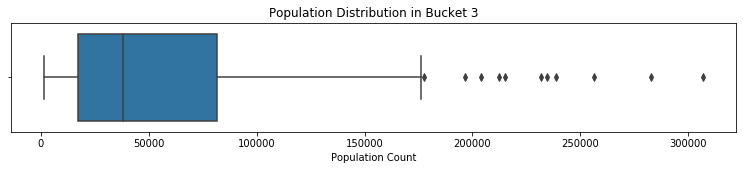

In [28]:
income_hist(3)

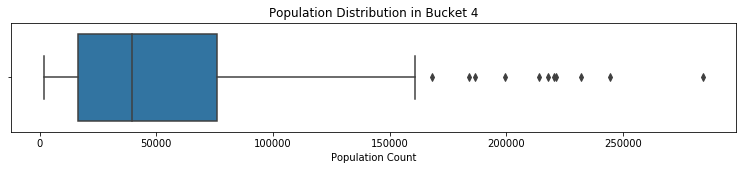

In [29]:
income_hist(4)

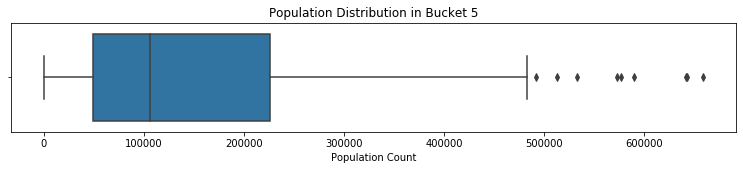

In [30]:
income_hist(5)

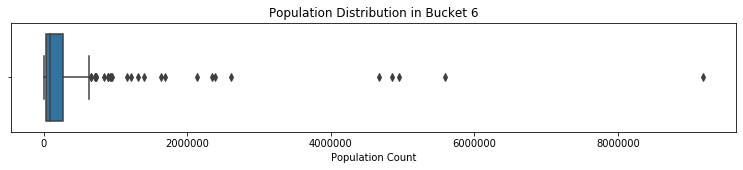

In [31]:
income_hist(6)

# Save to csv

In [70]:
irs.to_csv('data_jessica/irs_clean.csv', index=False)

# References

[IRS Individual Income Tax Statistics - 2017 ZIP Code Data](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi)

[Zip codes by county](https://www.bestplaces.net/)